In [126]:
import numpy as np
import matplotlib.pyplot as plt

mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
mean2 = [4, 5]
cov2 = [[1, 0], [0, 1]]

def gradient_descent(X_train, y_train, X_test, learning_rate, epochs):
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]
    w = np.zeros(X_train.shape[1])
    for i in range(epochs):
        y_pred = X_train @ w
        w = w - learning_rate * (X_train.T @ (y_pred - y_train))
    y_pred = X_test @ w
    return y_pred,w

Predictions:  [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Loss:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Test Error Rate:  2.0 %
Accuracy:  98.0 %


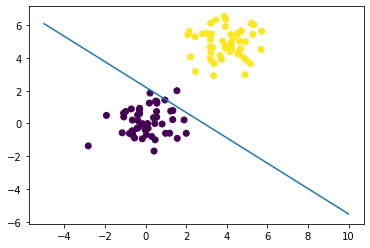

In [127]:
x1 = np.random.multivariate_normal(mean1, cov1, 50)
x2 = np.random.multivariate_normal(mean2, cov2, 50)

X_train = np.concatenate((x1, x2), axis=0)
y_train = np.concatenate((-1*(np.ones(50)), np.ones(50)), axis=0)

x1t = np.random.multivariate_normal(mean1, cov1, 25)
x2t = np.random.multivariate_normal(mean2, cov2, 25)

X_test = np.concatenate((x1t, x2t), axis=0)
y_test = np.concatenate((-1*(np.ones(25)), np.ones(25)), axis=0)

y_pred,w = gradient_descent(X_train, y_train, X_test, 0.0001, 100)

for i in range(len(y_pred)):
    if y_pred[i] > 0:
        y_pred[i] = 1
    else:
        y_pred[i] = -1

loss = np.zeros(len(y_pred))

for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        loss[i] = 0
    else:
        loss[i] = 1

print("Predictions: ", y_pred)
print("Loss: ", loss)
print("Test Error Rate: ", np.sum(loss)/len(loss)*100, "%")
print("Accuracy: ", 100 - np.sum(loss)/len(loss)*100, "%")

plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
x = np.linspace(-5, 10, 100)
y = -w[0]/w[2] - w[1]/w[2]*x
plt.plot(x,y)
plt.show()